In [1]:
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
import sys
from importlib import reload
import Saxs2dProfile as s2p
import Saxs1dProfile as s1p
import XafsData as xd
import util
import os

print("python", sys.version_info)
print("numpy", np.__version__)
print("cv2", cv2.__version__) # type: ignore
print("matplotlib", matplotlib.__version__) # type: ignore
print("cwd", os.getcwd())

python sys.version_info(major=3, minor=10, micro=12, releaselevel='final', serial=0)
numpy 1.25.1
cv2 4.8.0
matplotlib 3.7.2
cwd /home/oishi/SpectraSpark


In [64]:
reload(s2p)
reload(s1p)
reload(xd)
reload(util)
print(s2p.__version__)
print(s1p.__version__)
print(xd.__version__)
print(util.__version__)

0.0.25
0.0.12
0.0.1
0.0.1


In [58]:
s222_69_450c2w_2 = s1p.DafsData(
    "testdata/s222/Zn69_450C2wk_2/dafs", "../Zn69_450C2wk_dafs2.dat"
)
s222_69_450c2w_2.loadStdinfo("../../AgBeh/stdinfo.csv")

Saxs1dProfile [INFO]: loaded 481 files from /home/oishi/SpectraSpark/testdata/s222/Zn69_450C2wk_2/dafs from Saxs1dProfile.py:89
Saxs1dProfile [INFO]: loaded 481 files from /home/oishi/SpectraSpark/testdata/s222/Zn69_450C2wk_2/dafs from Saxs1dProfile.py:89
Saxs1dProfile [INFO]: loaded 481 files from /home/oishi/SpectraSpark/testdata/s222/Zn69_450C2wk_2/dafs from Saxs1dProfile.py:89
Saxs1dProfile [INFO]: loaded 481 files from /home/oishi/SpectraSpark/testdata/s222/Zn69_450C2wk_2/dafs from Saxs1dProfile.py:89
Saxs1dProfile [INFO]: loaded 481 files from /home/oishi/SpectraSpark/testdata/s222/Zn69_450C2wk_2/dafs from Saxs1dProfile.py:89
Saxs1dProfile [INFO]: loaded 481 files from /home/oishi/SpectraSpark/testdata/s222/Zn69_450C2wk_2/dafs from Saxs1dProfile.py:89
Saxs1dProfile [INFO]: loaded 481 files from /home/oishi/SpectraSpark/testdata/s222/Zn69_450C2wk_2/dafs from Saxs1dProfile.py:89
Saxs1dProfile [INFO]: loaded 481 files from /home/oishi/SpectraSpark/testdata/s222/Zn69_450C2wk_2/dafs f

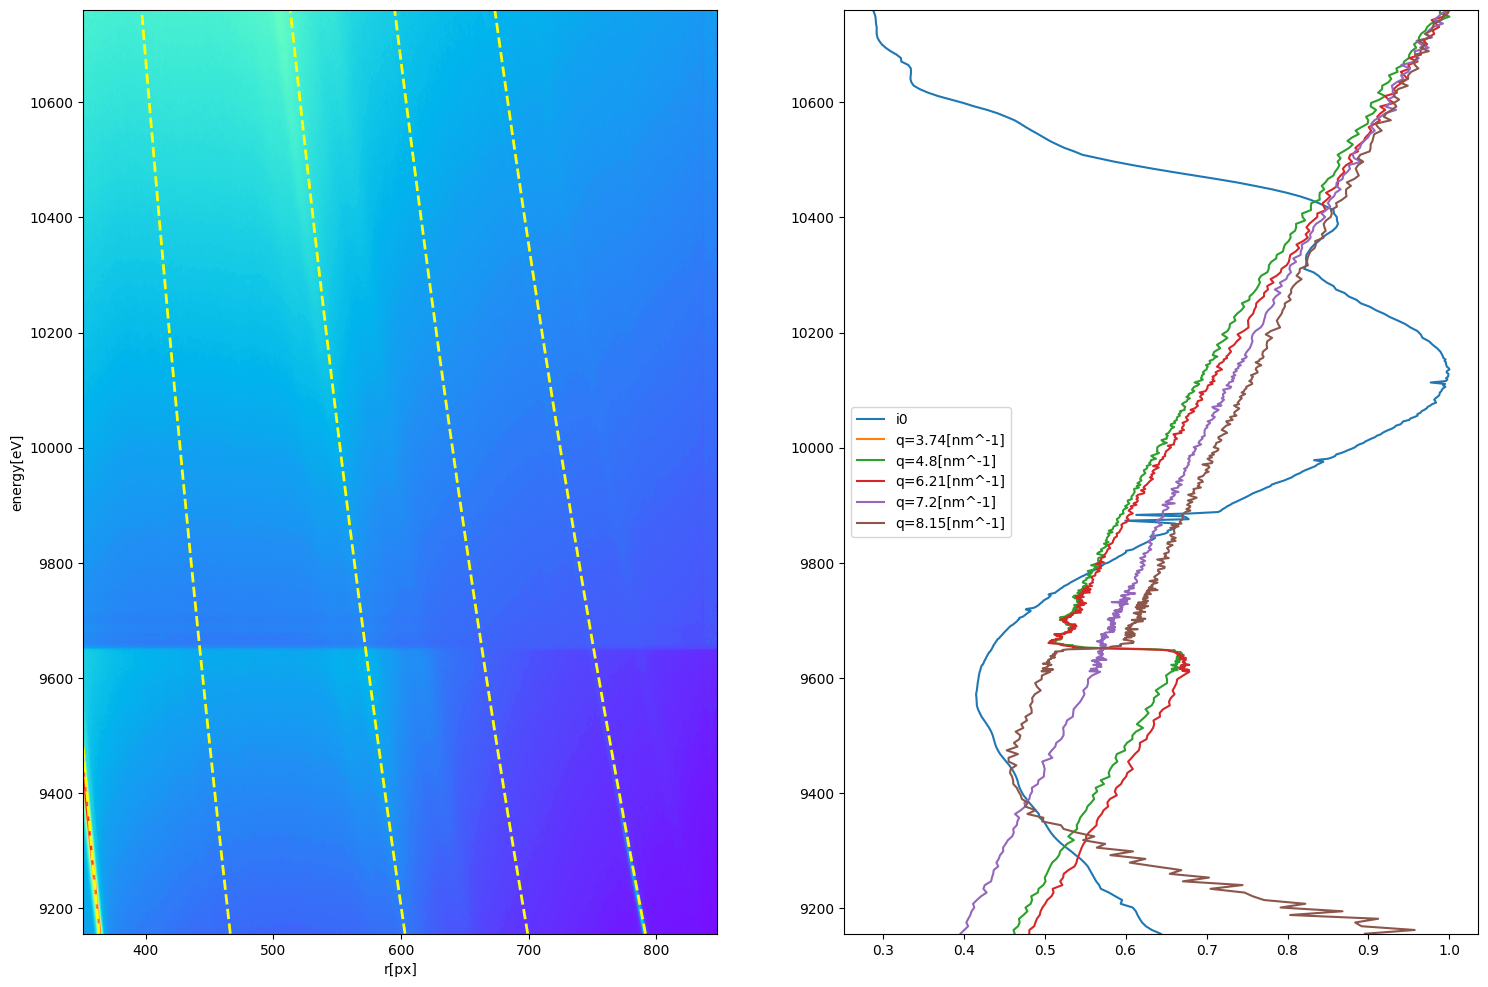

In [59]:
# 4.8: 5layer(10H)に対応するq
q = np.array([3.74, 4.8, 6.21, 7.2, 8.15])

fig, axs = plt.subplots(1, 2, figsize=(18, 12))
ax = axs[0]
ax = s222_69_450c2w_2.heatmap(ax, uselog=False, levels=250)
for qi in q:
    _q = np.full_like(s222_69_450c2w_2.energy, qi)
    _r = s222_69_450c2w_2.q2r(_q, s222_69_450c2w_2.energy)
    ax.plot(_r,s222_69_450c2w_2.energy, label=f"q={q[0]}[nm^-1]", color="yellow", linewidth=2, linestyle="dashed")
ax.set_xlim(s222_69_450c2w_2.r.min(), s222_69_450c2w_2.r.max())

ax = axs[1]
# out = np.empty((s222_69_450c2w_2.energy.size, q.size+1))
# out[:,0] = s222_69_450c2w_2.energy
ax.plot(s222_69_450c2w_2.i0/s222_69_450c2w_2.i0.max(), s222_69_450c2w_2.energy, label="i0")
for i,qi in enumerate(q):
    _i = s222_69_450c2w_2.q_slice(q=qi)
    # out[:,i+1] = _i
    _i = _i / _i.max()
    ax.plot(_i, s222_69_450c2w_2.energy, label=f"q={qi}[nm^-1]")
    
# out = out[~np.isnan(out).any(axis=1)]
# np.savetxt('dafs.dat',out,delimiter=' ',header='# energy[eV] q=4.8[nm^-1] q=6.24[nm^-1] q=7.2[nm^-1] q=8.02[nm^-1]')

ax.legend()

for ax in axs:
    ax.set_ylim(s222_69_450c2w_2.energy.min(), s222_69_450c2w_2.energy.max())

plt.show()

In [ ]:
center = (714.920, 107.247)
dir = "testdata/s202/XAFSisoA02/001"
for file in util.listFiles(dir, ext=".tif"):
    print(f"processing {file}...", end="")
    file = os.path.join(dir, file)
    profile = s2p.Saxs2dProfile.load_tiff(file)
    profile.auto_mask_invalid()
    profile.center = center
    i, bins = profile.radial_average(dr=1.0)
    r = (bins[:-1] + bins[1:]) / 2
    dist = file.replace(".tif", ".csv")
    header = "\n".join([f"src,{file}", f"center,({center[0]}, {center[1]})", "r[px],i"])
    data = np.vstack([r, i]).T
    np.savetxt(dist, data, delimiter=",", header=header)
    print("done")

In [65]:
s202_isoA02_001 = s1p.DafsData("testdata/s202/XAFSisoA02/001", "../isoA02_001.dat", xafscols=(4, 5))
s202_isoA02_001.loadStdinfo("../../Static/stdinfo.csv")

In [66]:
print(s202_isoA02_001.i0[::120])

[14154504. 10845025.  9825437.  8308468.  5527288.]


Saxs1dProfile [INFO]: loaded 481 files from /home/oishi/SpectraSpark/testdata/s202/XAFSisoA02/001 from Saxs1dProfile.py:89
Saxs1dProfile [INFO]: loaded 481 files from /home/oishi/SpectraSpark/testdata/s202/XAFSisoA02/001 from Saxs1dProfile.py:89
Saxs1dProfile [INFO]: loaded 481 files from /home/oishi/SpectraSpark/testdata/s202/XAFSisoA02/001 from Saxs1dProfile.py:89
Saxs1dProfile [INFO]: loaded 481 files from /home/oishi/SpectraSpark/testdata/s202/XAFSisoA02/001 from Saxs1dProfile.py:89
Saxs1dProfile [INFO]: loaded 481 files from /home/oishi/SpectraSpark/testdata/s202/XAFSisoA02/001 from Saxs1dProfile.py:89
Saxs1dProfile [INFO]: loaded 481 files from /home/oishi/SpectraSpark/testdata/s202/XAFSisoA02/001 from Saxs1dProfile.py:89
Saxs1dProfile [INFO]: loaded 481 files from /home/oishi/SpectraSpark/testdata/s202/XAFSisoA02/001 from Saxs1dProfile.py:89
Saxs1dProfile [INFO]: loaded 481 files from /home/oishi/SpectraSpark/testdata/s202/XAFSisoA02/001 from Saxs1dProfile.py:89
Saxs1dProfile [I

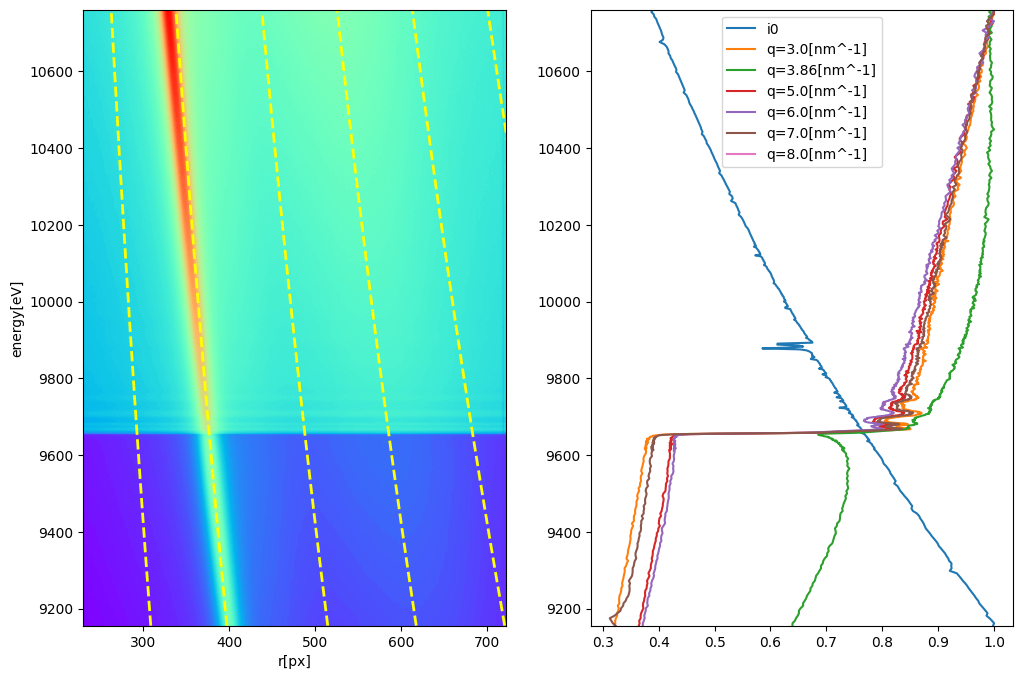

In [67]:
q = np.array([3.0, 3.86, 5, 6, 7, 8])

fig, axs = plt.subplots(1,2,figsize=(12,8))
ax = axs[0]
ax = s202_isoA02_001.heatmap(ax, levels=200)

for qi in q:
    _q = np.full_like(s202_isoA02_001.energy, qi)
    _r = s202_isoA02_001.q2r(_q, s202_isoA02_001.energy)
    ax.plot(
        _r,s202_isoA02_001.energy, label=f"q={qi}[nm^-1]", color="yellow", linewidth=2,
        linestyle="dashed"
    )
ax.set_xlim(s202_isoA02_001.r[0], s202_isoA02_001.r[-1])

ax = axs[1]
ax.plot(s202_isoA02_001.i0/s202_isoA02_001.i0.max(), s202_isoA02_001.energy, label="i0")
for qi in q:
    _i = s202_isoA02_001.q_slice(qi)
    _i = _i / _i.max()
    ax.plot(
        _i, s202_isoA02_001.energy, label=f"q={qi}[nm^-1]"
    )
ax.legend()

for ax in axs:
    ax.set_ylim(s202_isoA02_001.energy[0], s202_isoA02_001.energy[-1])